In [1]:
# ChromBERT TRN Inference Example
#
# This notebook demonstrates how to infer Transcriptional Regulatory Networks (TRNs)
# using the ChromBERT-tools Python API.

from chrombert_tools import infer_trn

In [2]:
# Set working directory to examples folder
import os
os.chdir("/mnt/Storage2/home/chenqianqian/projects/chrombert/chrombert_tools/ChromBERT-tools/examples")

Region summary - total: 100, overlapping with ChromBERT: 100 (one region may overlap multiple ChromBERT regions), non-overlapping: 0
Note: All regulator names were converted to lowercase for matching.
Regulator count summary - requested: 3, matched in ChromBERT: 3, not found: 0not found regulator: []
Your supervised_file does not contain the 'label' column. Please verify whether ground truth column ('label') is required. If it is not needed, you may disregard this message.
use organisim hg38; max sequence length is 6391


100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


Total graph nodes: 765
Total graph edges (threshold=0.712): 5752
Finished!
Saved outputs to: ./output_trn


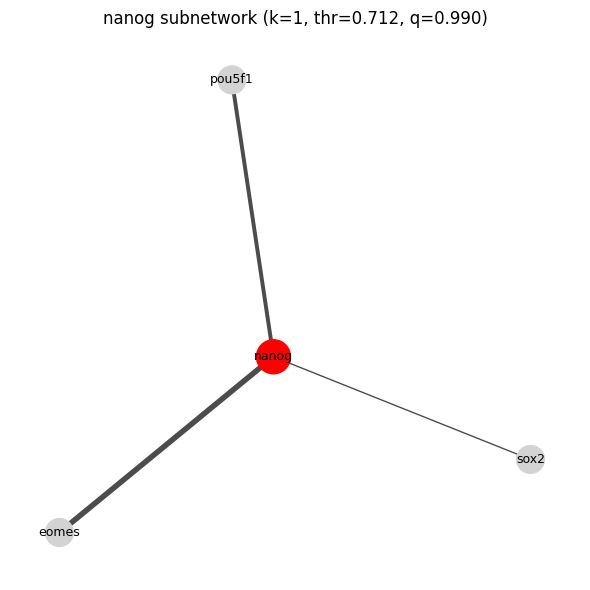

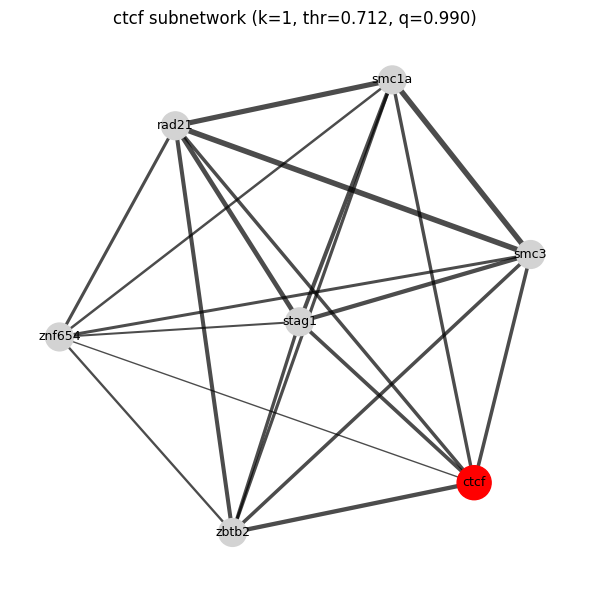

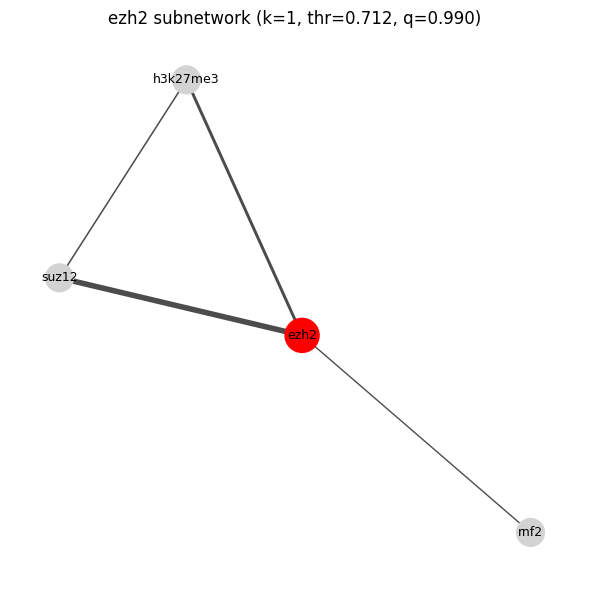

In [4]:
# Infer TRN from genomic regions
# Returns:
#   df_edges: DataFrame with columns [node1, node2, cosine_similarity]
#   Contains edges in the regulatory network where similarity >= threshold
#   Contains subnetwork visualizations for specified regulators

df_edges = infer_trn(
    region="./data/CTCF_ENCFF664UGR_sample1000.bed",
    regulators="ctcf;nanog;ezh2",      # Plot subnetworks for these regulators
    odir="./output_trn",
    genome="hg38",                      # Options: "hg38", "mm10"
    resolution="1kb",                   # Options: "1kb", "2kb", "4kb", "200bp"
)

In [5]:
df_edges

,node1,node2,cosine_similarity
0,5hmc,rloop,0.756476
1,adnp,phf20,0.723680
2,aebp2,barhl1,0.733367
3,aebp2,casp8ap2,0.713855
4,aebp2,creb3,0.713283
...,...,...,...
5747,znf85,zscan31,0.877992
5748,znf860,znf93,0.803251
5749,zscan20,zscan23,0.739037
5750,zscan20,zscan5a,0.757539


In [6]:
df_edges.query("node1 == 'nanog' or node2 == 'nanog'")

,node1,node2,cosine_similarity
726,eomes,nanog,0.758861
1661,nanog,pou5f1,0.755285
1662,nanog,sox2,0.749701


In [7]:
df_edges.query("node1 == 'ezh2' or node2 == 'ezh2'")

,node1,node2,cosine_similarity
819,ezh2,h3k27me3,0.751440
820,ezh2,rnf2,0.716335
821,ezh2,suz12,0.809129


In [8]:
df_edges.query("node1 == 'ctcf' or node2 == 'ctcf'")

,node1,node2,cosine_similarity
523,ctcf,rad21,0.851742
524,ctcf,smc1a,0.844970
525,ctcf,smc3,0.856302
526,ctcf,stag1,0.865400
527,ctcf,zbtb2,0.898986
528,ctcf,znf654,0.731698
